In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
# Below libraries are for feature representation using sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
# Below libraries are for similarity matrices using sklearn
from sklearn.metrics import pairwise_distances
from IPython.display import clear_output
import warnings
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plotly.offline.init_notebook_mode (connected = True)
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a id='2'></a>
# Importing the data

In [3]:
! pip install kaggle
! kaggle datasets download arashnic/mind-news-dataset

Error processing line 1 of C:\Users\shree\anaconda3\lib\site-packages\distutils-precedence.pth:

  Traceback (most recent call last):
    File "C:\Users\shree\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored
Error processing line 1 of C:\Users\shree\anaconda3\lib\site-packages\distutils-precedence.pth:

  Traceback (most recent call last):
    File "C:\Users\shree\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored
Traceback (most recent call last):
  File "C:\Users\shree\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\shree\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\shree\anaconda3\Scripts\

In [4]:
data=pd.read_csv('mind-news-dataset/news.tsv/news.tsv',header=None,sep='\t')

In [5]:
data.columns=['News ID',
"Category",
"SubCategory",
"Title",
"Abstract",
"URL",
"Title Entities",
"Abstract Entities "]

<a id='3'></a>
# Having a look at the data

In [6]:
data.head()['Title'][0]

'The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By'

<a id='4'></a>
# Selecting the needed columns

In [7]:
data=data.iloc[:,:6]

In [8]:
data.head()['Title'][0]

'The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By'

<a id='5'></a>
# Visualizing The Data

<a id='5.1'></a>
# Category and Subcategory distribution in data

In [9]:
c=data[['Category','SubCategory']].value_counts()

In [10]:
index=[]
for i in c.index:
    index.append(np.array(i))
index=np.array(index)

In [11]:
df=pd.DataFrame(columns=['Category','Sub Category','Values'])
df['Category']=index[:,0]
df['Sub Category']=index[:,1]
df['Values']=c.values

In [12]:
px.bar(data_frame=df,x='Category',y='Values',color='Sub Category')

### From this we can clearly see that the most of the news was on the Category of news with subcategory newsus followed by sports with football news

<a id='5.2'></a>
# WordCloud For Sports News

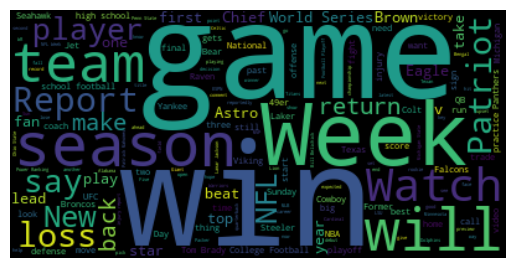

In [13]:
text=' '
for i in data[data['Category']=='sports']['Title']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()


<a id='5.3'></a>
# Wordcloud for news

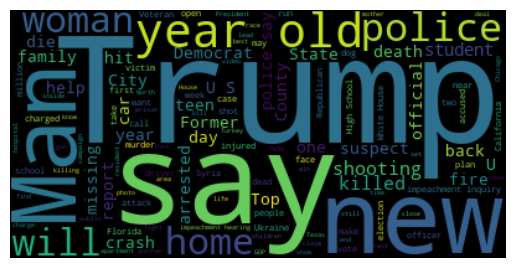

In [14]:
text=' '
for i in data[data['Category']=='news']['Title']:
    text+=i+' '
    
# Make the figure
wordcloud = WordCloud().generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()


Wow the main attraction of news has been Trump :)

<a id='5.4'></a>
# Histogram For Title Length

In [15]:
t=[]
for i in data['Title']:
    t.append(len(i))
px.histogram(t,color=data['Category'])

Well most of the titles are in the range of 50 to 100 words :) So if you are gonna write a news article keep the title in 50 - 100 words :)

<a id='6'></a>
# Data Preprocessing

<a id='6.1'></a>
## Checking and removing all the duplicate values

In [16]:
print('the number of articles before processing :',len(data))
data.drop_duplicates(subset=['Title'],inplace=True)
print('The number of articles after processing :',len(data))

the number of articles before processing : 51282
The number of articles after processing : 50434


<a id='6.2'></a>
## Checking for NaN values

In [17]:
data.isna().sum()

News ID           0
Category          0
SubCategory       0
Title             0
Abstract       2646
URL               0
dtype: int64

<AxesSubplot: >

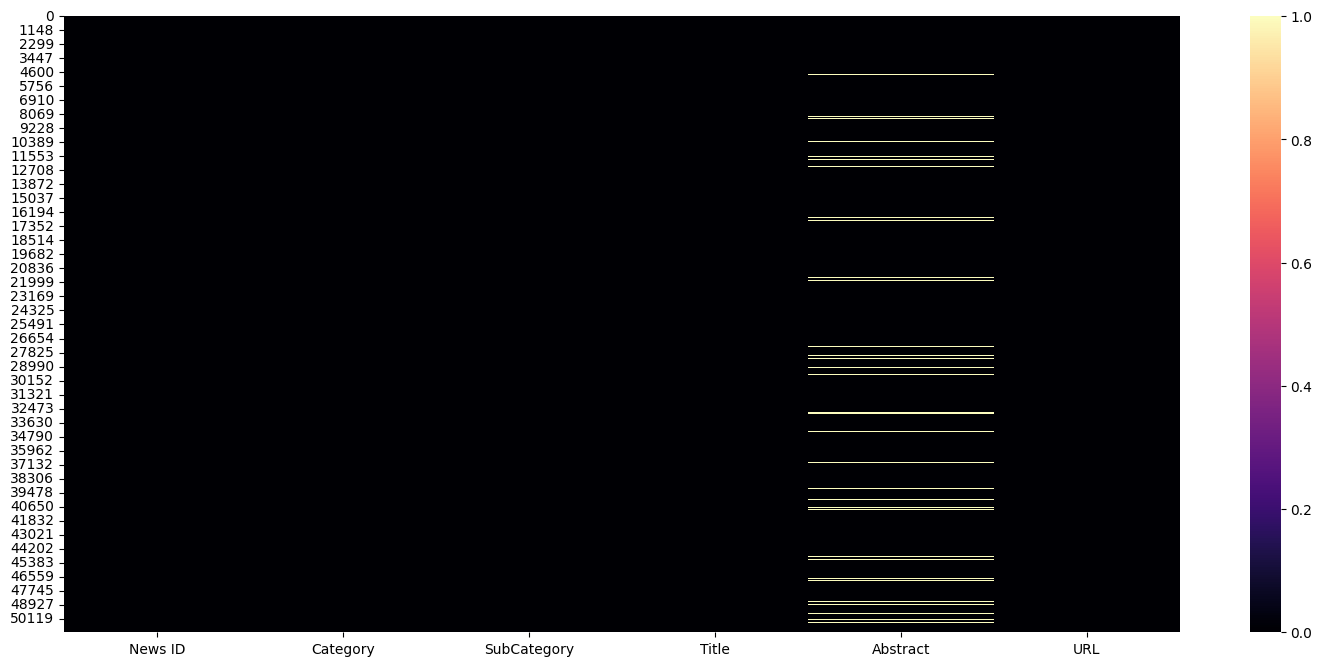

In [18]:
plt.figure(figsize=(18,8))
sns.heatmap(data.isnull(), cbar=True, cmap='magma')


In [19]:
data.dropna(inplace=True)

<a id='6.3'></a>
## Getting Titles with more than 4 words

In [20]:
print('the number of articles before processing :',len(data))
data=data[data['Title'].apply((lambda x: len(x.split())>=4))]
print('The number of articles after processing :',len(data))

the number of articles before processing : 47788
The number of articles after processing : 47661


<a id='7'></a>
# Text Preprocessing

In [21]:
df2=data.copy()

In [22]:
data=data.iloc[:,:5]

In [23]:
# This function is to remove stopwords from a particular column and to tokenize it
def rem_stopwords_tokenize(data, name):
    stop_words = set(stopwords.words('english'))

    def getting(sen):
        word_tokens = word_tokenize(sen)
        filtered_sentence = [w for w in word_tokens if w.lower() not in stop_words]
        return filtered_sentence

    data[name] = data[name].apply(getting)
    return data

In [24]:
lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a
    return data

In [25]:
# Removing Stop words from Title Column
data = rem_stopwords_tokenize(data,'Title')

In [26]:
# Lemmatizing the Title column
data = lemmatize_all(data,'Title')

In [27]:
# Making a copy of data to use in the future
data4=data.copy()

## Converting Back To String

In [28]:
def convert_to_string(data,name):
    t=data[name].values
    p=[]
    for i in t:
        listToStr = ' '.join(map(str, i))
        p.append(listToStr)
    data[name]=p
    return data


In [29]:
data = convert_to_string(data,'Title')

## Converting the text

<a id='9'></a>
# Using TF-IDF Method

In [30]:
tfidf_headline_vectorizer = TfidfVectorizer(min_df = 0)

In [31]:
data.to_csv('../data/processed_data.csv', index=False)

# Save df2 if needed
df2.to_csv('../data/raw_data.csv', index=False)

In [246]:
name = "The Brands Queen Elizabeth, Prince Charles, and Prince Philip Swear By"
df2[df2['Title']==name].index

Int64Index([0], dtype='int64')

In [33]:
df2 = pd.read_csv("../data/raw_data.csv")
data = pd.read_csv("../data/processed_data.csv")
def TFIDF_based_model(row_index, num_similar_items):
    cate=data['Category'][row_index]
    name=data['Title'][row_index]
    cate_data=data[data['Category']==cate]
 
    row_index2=cate_data[cate_data['Title']==name].index
    headline_features   = tfidf_headline_vectorizer.fit_transform(cate_data['Title'].values)

    couple_dist = pairwise_distances(headline_features,headline_features[row_index2])
    indices = np.argsort(couple_dist.ravel())[0:num_similar_items]
    df = pd.DataFrame({'headline':data[data['Category']==cate]['Title'].values[indices],
                       'Category':cate_data['Category'].values[indices],
                       'Abstract':cate_data['Abstract'].values[indices],
                'Euclidean Distance Similarity': couple_dist[indices].ravel()})
    print("="*30,"News Article Name","="*30)
    print('News Headline : ',data['Title'][indices[0]])
    print("\n","="*26,"Recommended News Using TFIDf: ","="*30)
    return df.iloc[1:,:]

name=input('News Title For Recommendation :')
clear_output()
ind=df2[df2['Title']==name].index[0]
dd=TFIDF_based_model(ind, 100)
dd.head(10)

============================== News Article Name ==============================
News Headline :  Brands Queen Elizabeth , Prince Charles , Prince Philip Swear

 ========================== Recommended News Using TFIDf:  ==============================


,headline,Category,Abstract,Euclidean Distance Similarity
1,Queen Elizabeth Prince William-Prince Harry Feud,lifestyle,"According to royal insiders, Queen Elizabeth h...",1.039160
2,Prince Charles Getting Fashion,lifestyle,Prince Charles is now getting into fashion wit...,1.125233
3,Prince Charles Teared Prince William Talked Su...,lifestyle,"Frankly, it reduced me to tears, he said.",1.150507
4,Prince Charles Getting Fashion Business,lifestyle,The Prince's Foundation is partnering with the...,1.172903
5,Meghan Markle Prince Harry Wo n't Spend Christ...,lifestyle,They'll hang out with baby Archie and Meghan's...,1.199783
6,See Best Photos Prince Charles 's Trip India,lifestyle,The Prince of Wales kicked off his 10th offici...,1.211219
7,Look Back Prince Charles Camilla 's Relationsh...,lifestyle,In honor of the third season of The Crown.,1.213412
8,Prince Harry Meghan Markle shared never-before...,lifestyle,The Duke and Duchess of Sussex shared a new ph...,1.220773
9,65 Photos Prince Charles 've Probably Never Seen,lifestyle,Looking back at the Prince of Wales's best mom...,1.230840
10,Happen Queen Elizabeth Dies,lifestyle,Queen Elizabeth is the longest ruling monarch ...,1.236106


WEll the recommendations are different and looks better :) 

Let's see if we can make it much better :)

### Why TFIDF is good ??

* It’s fast and works well when documents are large and/or have lots of overlap.
* It looks for exact matches, so at the very least you should use a lemmatizer to take care of the plurals.
* When comparing short documents with limited-term variety — such as search queries — there is a risk that you will miss semantic relationships where there isn’t an exact word match.